# CSE 5520 Homework 4

| | |
|-|-|
| **Student** | Lynn Pepin ('Tristan Pepin')
|              | tmp13009 / 2079724
| **Due date** | 2021 / Sept / 30 (Thur), 11:59PM


This is Lynn Pepin's report for CSE 5520 homework 4.

---

This homework is to help you practice with some data visualization fundamentals. You are
expected to use these visualization techniques and others in your final project. You are required
to do this exercise in Python. All plots/graphs must have titles and x-y coordinate tick labels. 

# Part 1: t-Test and p-value

Consider again the gene expression data sets introduced in Homework 3.

Your analysis is limited to comparing
the Dementia group (GSE44768_CR_alz_female_reduced.csv) and the
Non-Dementia group (GSE44768_CR_nd_female_reduced.csv).

Your study goal is to construct and contrast
a $2 x 2$ plot capturing various t-test outcomes for 2 genes, `LAMP2` and `BSN`.

In terms of the columns of the $2 x 2$ plot,
the first column is to show two histograms in one plot
(red for Dementia and blue for non-Dementia for one gene)
similar to what you practiced in Homework 3.
The second column is to show t-Test PDF.
The steps given below is to guide you how to do this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EPS = 0.0000001
FINAL = False

def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

In [47]:
dem_df = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
ndem_df = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')

# Data exploration: Do these all have the same keys?
if not FINAL:
    print(list(dem_df.keys()))
    print("Do these all have the same keys?",
        (dem_df.keys() == ndem_df.keys()).all()
    )

# constants holding all the keys we look at
GENES = [
    'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4',
    'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA',
    'RPS27', 'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2',
    'TUBB4', 'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN',
    'MED6', 'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1',
    'GJA1', 'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN',
    'GLS', 'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1',
    'EGR2', 'PDGFB'
]

['GSM_ID', 'disease', 'age', 'gender', 'pmi', 'pH', 'rin', 'pres', 'batch', 'tissue', 'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2', 'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27', 'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4', 'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6', 'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1', 'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS', 'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1', 'EGR2', 'PDGFB']
Do these all have the same keys? True


## Step 1.

Create and show two histograms in one plot for the gene `LAMP2` with different colors,
red for the Dementia group and blue for the Non-Dementia group into one plot.
It should be the first subplot of the first 1 x 2 plot.

In [3]:
#diff_of_means = dem_df[GENES].mean(axis=0) - ndem_df[GENES].mean(axis=0)

#print(f"Means are closest at {diff_of_means.idxmin()} and furthest at {diff_of_means.idxmax()}")

(array([2., 6., 4., 1., 3., 2., 0., 0., 0., 1.]),
 array([-0.41211723, -0.34976484, -0.28741245, -0.22506005, -0.16270766,
        -0.10035527, -0.03800287,  0.02434952,  0.08670191,  0.14905431,
         0.2114067 ]),
 <BarContainer object of 10 artists>)

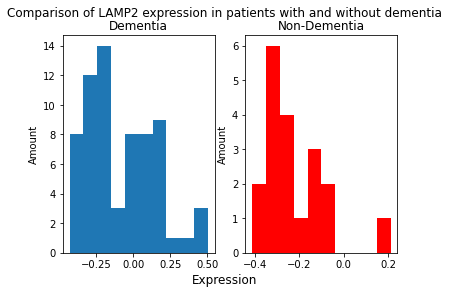

In [48]:
gene = 'LAMP2'
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


fig, axs = plt.subplots(1,2)# sharey=True)
fig.suptitle("Comparison of LAMP2 expression in patients with and without dementia")
#fig.supylabel("")
fig.supxlabel("Expression")

axs[0].set_title("Dementia")
axs[1].set_title("Non-Dementia")
axs[0].set_ylabel("Amount")
axs[1].set_ylabel("Amount")


axs[0].hist(dem_df['LAMP2'])
axs[1].hist(ndem_df['LAMP2'], color='red')
#axs[0].plot(range(10), [(x**4)/3000 - .5 for x in range(10)])
#axs[1].plot(range(10), [np.sin(x/3) for x in range(10)])
#axs[2].plot(range(10), [np.cos(x/3) for x in range(10)])

## Step 2.

Perform t-Test (Hint, unequal variance, unequal sample size) and show PDF.
In the PDF plot, indicate the critical region (significance level $\alpha$ = 0.05)
by placing two dots, arrows or lines near the x-axes.

You can even color the critical region (area) on the plot if you know how to do
this for **extra credits**
(Note visual communication is the theme of this course).
Coloring the critical region is not required.

Then display $t_{obs}$ by placing a different colored dot, arrow or line near the x-axes. 

Using a markdown cell, state if you would reject $H_0$ or not.
$H_0$ is ''The mean values of gene expression between the Dementia group
and Non-Dementia group among female patients are **not different**”
and $H_1$ is “The mean values of gene expression between the Dementia group and
Non-Dementia group among female patients **are different**
(one could be higher or lower than the other)”.

This t-Test’s PDF is the second subplot of the first 1 x 2 plot. The plot
title for the PDF should include the calculated DF (degrees of freedom).

In [49]:
alpha = 0.05
pass

## Step 3.

Repeat Steps 1 and 2 for the gene BSN. This is to generate the second 1 x 2 plot.

## Step 4.

Lastly, stack two 1 x 2 plots you created in Steps 1, 2 and 3 “top to bottom”
to create one 2 x 2 plot and display it.
Use a markdown cell and explain how to interpret/contrast the plots you generated.
For example, in which case you would reject/accept H0 and why.

# Part II: Clustering and Heatmap

Consider the pre-processed Alzheimer data set `GSE44768_CR_40_54_Combined.csv`
which is available at HuskyCT’s Data folder.
MS Excel version is also available that differentiates samples by color highlights. 


In [74]:
alz_df = pd.read_csv("GSE44768_CR_40_54_Combined.csv")
print(alz_df.keys())

Index(['GSM_ID', 'XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2',
       'TIMELESS', 'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27',
       'RPS18', 'PCBP2', 'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4',
       'ACTG1', 'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6',
       'SFRS3', 'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1',
       'STON2', 'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS',
       'DTL', 'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1',
       'EGR2', 'PDGFB'],
      dtype='object')


In [75]:
# get male and female
f_df = alz_df[
    [alz_df['GSM_ID'][ii][-1] == 'f'
     for ii in range(len(alz_df))
    ]
]

m_df = alz_df[
    [alz_df['GSM_ID'][ii][-1] == 'm'
     for ii in range(len(alz_df))
    ]
]

# now split into alz/no alz
falz_df = f_df[
    [alz_df['GSM_ID'][ii][11] == 'a'
     for ii in range(len(f_df))
    ]
]

fnd_df = f_df[
    [alz_df['GSM_ID'][ii][11] == 'n'
     for ii in range(len(f_df))
    ]
]

malz_df = m_df[
    [alz_df['GSM_ID'][ii][11] == 'a'
     for ii in range(len(m_df))
    ]
]

mnd_df = m_df[
    [alz_df['GSM_ID'][ii][11] == 'n'
     for ii in range(len(m_df))
    ]
]

if not FINAL:
    print("FALZ", falz_df)
    print("FND", fnd_df)
    print("MALZ", malz_df)
    print("MND", mnd_df)

FALZ              GSM_ID      XIST    TYROBP     DOCK2    FCER1G     GSTA4  \
0  GSM1090268_alz_f  0.301474  0.209515  0.161961  0.310937 -0.179295   
1  GSM1090271_alz_f  0.460495 -0.162172 -0.089598 -0.132007 -0.010090   
2  GSM1090272_alz_f  0.238641  0.280427  0.313561  0.267188 -0.104727   
3  GSM1090274_alz_f  0.276038  0.400028  0.251572  0.275051 -0.330179   
4  GSM1090276_alz_f  0.435775 -0.293323 -0.262795 -0.138666 -0.016549   
5  GSM1090277_alz_f  0.245945 -0.420656 -0.350320 -0.316967 -0.146123   
6  GSM1090282_alz_f  0.440187  0.199408 -0.095610  0.384826 -0.112760   
7  GSM1090284_alz_f  0.366115 -0.033795 -0.092537  0.150413  0.099431   
8  GSM1090285_alz_f  0.342604 -0.191431 -0.165283 -0.041819 -0.316507   
9  GSM1090291_alz_f  0.497142 -0.298360 -0.224981 -0.236750  0.108094   

      ABCC2  TIMELESS     ACBD5     LMAN1  ...       DTL     UBE2C      BUB1  \
0 -0.009254  0.027849  0.057428 -0.041127  ...  0.008948  0.009005  0.124712   
1  0.027530 -0.007816 -0.006689

## Step 1.

Import and show a 40 x 54 gene expression value matrix.
The row ids (sample name) should make it clear how this matrix was created.
Only 10 samples from different patients are included in this file.
Here `alz`/`nd` means dementia or no and `f`/`m` denotes gender. 

## Step 2.

Perform a sample-wise hierarchal clustering using Ward method for the linkage algorithm.
Note that using Ward method can be easily done by choosing the right option from the library.
The outcome should exhibit how the 40 samples from four subgroups
(Male Dementia/ Male Non-Dementia / Female Dementia / Female Non-Dementia) are clustered. 

Using a markdown cell, discuss how you would interpret the outcome,
i.e., is it what you expected to see or not,
i.e., samples from each of the four groups are clustered?

## Step 3.

Perform a gene-wise hierarchal clustering using Ward method for the linkage algorithm.
It should exhibit how the genes are clustered independent of sample group membership.

Using a markdown cell, discuss how you would interpret the outcome,
i.e., do you notice formation of any subgroups of genes behaving similarly across samples?

## Step 4.

Perform the ultimate hierarchal clustering by performing both column-wise and genewise clustering.
Again you use Ward method for the linkage algorithm.

Using a markdown cell, discuss how you would interpret the outcome.
For example, can you isolate a group of meaningful genes cutting across gender (M/F)
and/or disease phenotype (Dementia/NonDementia)?

## Part III: Bayesian Inference

Consider two people, Joe and Jim, who went to cancer screening at different clinics,
Joe for prostate cancer screening and Jim for breast cancer screening.

Male breast cancer is rare
(“less than 1% of all breast cancers occur in men”, https://www.breastcancer.org/symptoms/types/male_bc)
but prostate cancer is common
(“About 6 cases in 10 are diagnosed in men who are 65 or older”, https://www.cancer.org/cancer/prostate-cancer/about/key-statistics.html).

Both heard that their cancer screenings turned out positive.

In this exercise, assume
P(Cancer=Male_breast) = 0.01
and P (Cancer=Male_prostate) = 0.6.

Also assume TPR and TNR for prostate cancer screening are 0.75 and 0.70
and TPR and TNR for breast cancer screening are 0.85 and 0.80, respectively.


## Step 1.

Create a contingency table for Bayesian inferencing for each individual.
You show two tables, one for Joe and one for Jim.

## Step 2.

This time, convert each contingency table you created in Step 1
into a grid-based plot designed to visualize Bayesian inference.

Show two 20x20 grid-based illustrations “side by side” to contrast the two cases.
You are illustrating Bayesian inferencing using the population size of 400 people in each case,
following the discussion we had in class.

Coloring of dots properly should differentiate TP/FP/FN/TN cases
(i.e., treating dots as people belong to each of these four cases).
Suggested colors for dots are: TP – red, FP – blue, FN – maroon, and TN – gray
following the convention used in “Example 2 – Drug testing” in lecture slide.

Boxing the dots using the code given in the class to label the cancer population $(TP \cup FN)$ 
and/or non-cancer population $(TN \cup FP)$ can be done for **extra credit.**
Using the boxing to label the groups is not required.

Make sure the titles of plots include person name
and $\mathbb{P}( \text{Cancer}=\text{yes} | \text{test}=\text{positive} )$, 
i.e., the probability that the person has cancer upon hearing the positive screening outcome news.

## Step 3.
Using a markdown cell, discuss what you can say with the two 20x20 grid-based plots you are contrasting,
e.g., the impact of prior vs. likelihood in computing the posterior. 

---

# Various useful resources

## **Computing degrees of freedom**:

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

There is an error in this URL post. The corrected and “augmented”
version is here. Setting the variables A and B is included:

```
from statistics import mean

import math
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)
 
A = Alz # includes values for Alzheimers’
B = ND # includes values for Non-Dementia

print('Degrees of freedom for Student-t distribution: ' + str(degreesOfFreedom(A, B)))
```

## Plotting t-test PDF:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

You can use 0.001 and 0.999 instead of 0.01 and 0.99 to stretch tails.

```
x = np.linspace(
    t.ppf(0.001, df),
    t.ppf(0.999, df), 100)
```

## Calculating Critical Region:

https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/

Note: You use two tail t-test since you do not care if test sample
distribution is larger or smaller than the control sample
distribution; you care only different or not. In case of one tail, you
set p=0.95. In case of two tail test, you set p = 0.975 for the
critical region calculation